In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import community # pip install python-louvain
import infomap   # pip install infomap
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Infomap

In [2]:
from infomap import Infomap

In [3]:
data = pd.read_csv(
    r'..\data\facebook\facebook_combined.txt',
    sep=" ",
    names=["start_node", "end_node"],
)
G = nx.from_pandas_edgelist(data, "start_node", "end_node")

In [4]:
im = Infomap("--two-level --silent")
mapping = im.add_networkx_graph(G)
im.run()

partition = {}
for node in im.nodes:
    partition[node.node_id] = node.module_id

In [5]:
pos = nx.spring_layout(G, iterations=20, seed=1721)

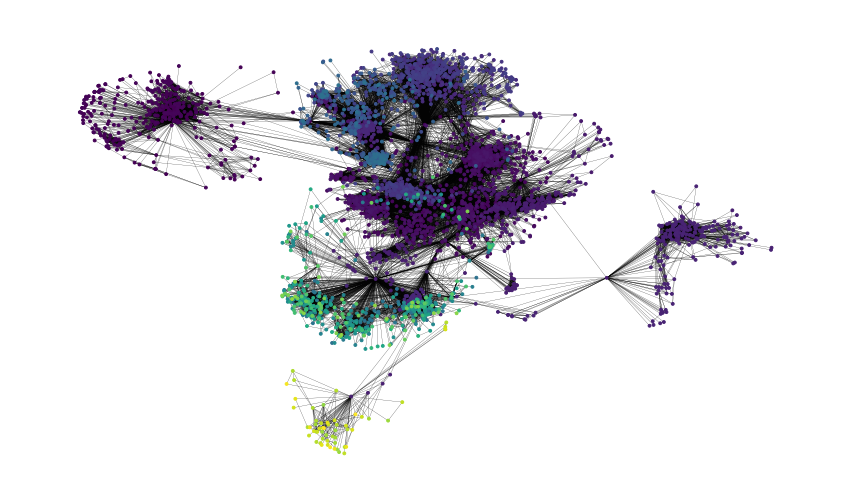

In [6]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color = list(partition.values()), **{"node_size": 8,  "width": 0.2, "with_labels": False})#, **plot_settings)
plt.show()

+ 社区数量和模块度计算

In [7]:
import networkx.algorithms.community as nx_comm
# modularity = modularity(partition, G)
communities = []
num = max(partition.values())
for i in range(num):
    communities.append(set())
for key,val in partition.items():
    communities[val-1].add(key)
    
modularity = nx_comm.modularity(G, communities)
print([num, modularity])

[74, 0.8120019909637307]


## Louvain

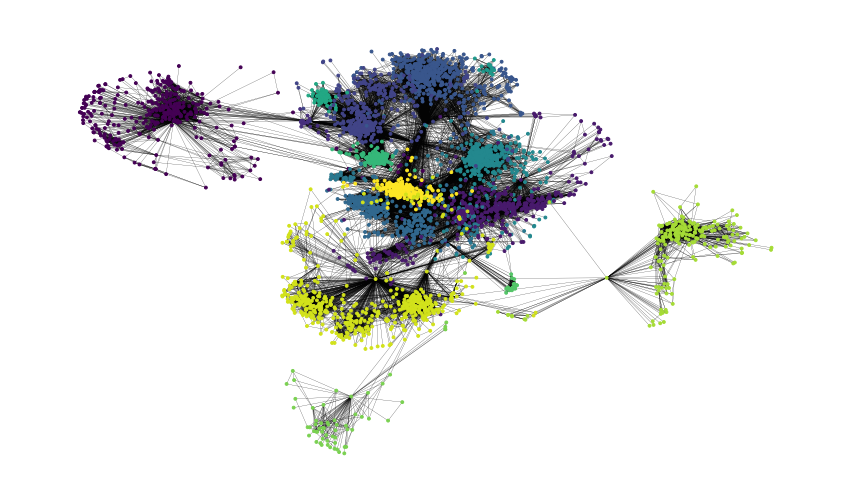

In [8]:
# pip install python-louvain
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color = list(partition.values()), **{"node_size": 8,  "width": 0.2, "with_labels": False})#, **plot_settings)
plt.show()

+ 社区数量和模块度计算

In [9]:
communities = []
num = max(partition.values())
for i in range(num):
    communities.append(set())
for key,val in partition.items():
    communities[val-1].add(key)
    
modularity = nx_comm.modularity(G, communities)
print([num, modularity])

[15, 0.830703079724534]


## Label Propagation


[44, 0.7368407345348218]


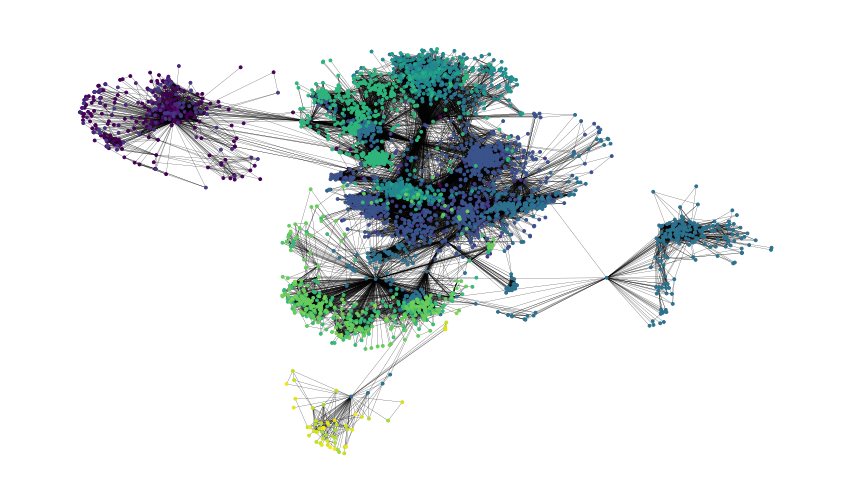

In [10]:
import networkx.algorithms.community as nx_comm
communities = nx_comm.label_propagation_communities(G)
communities = list(communities)
partition = {}
for i in range(0,len(communities)):
    for node in communities[i]:
        partition[node] = i
modularity = nx_comm.modularity(G, communities)

print([len(communities), modularity])
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color = list(partition.values()), **{"node_size": 8,  "width": 0.2, "with_labels": False})#, **plot_settings)
plt.show()